# EDA

- panda data reader
- date time index
- time resampling
- time shifts
- mean rolling and expanding
- time series visualization
- one sample project on time series

## Pandas Data reader


In [2]:
# installing pandas data reader
!pip install pandas-datareader

                                              0.0/109.5 kB ? eta -:--:--
     ---                                      10.2/109.5 kB ? eta -:--:--
     ---                                      10.2/109.5 kB ? eta -:--:--
     ---                                      10.2/109.5 kB ? eta -:--:--
     ------------------------              71.7/109.5 kB 359.3 kB/s eta 0:00:01
     ------------------------              71.7/109.5 kB 359.3 kB/s eta 0:00:01
     ------------------------              71.7/109.5 kB 359.3 kB/s eta 0:00:01
     ------------------------------------ 109.5/109.5 kB 318.0 kB/s eta 0:00:00


In [8]:
!pip install --upgrade pandas_datareader

In [9]:
!pip install yfinance

                                              0.0/72.4 kB ? eta -:--:--
     ----------------                         30.7/72.4 kB ? eta -:--:--
     ----------------                         30.7/72.4 kB ? eta -:--:--
     -------------------------------------- 72.4/72.4 kB 497.3 kB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
                                              0.0/314.6 kB ? eta -:--:--
     -------                                 61.4/314.6 kB 3.4 MB/s eta 0:00:01
     -------                                 61.4/314.6 kB 3.4 MB/s eta 0:00:01
     -------------------                    163.8/314.6 kB 1.2 MB/s eta 0:00:01
     -----------------------                194.6/314.6 kB 1.1 MB/s eta 0:00:01
     -----------------------                194.6/314.6 kB 1.1 MB/s eta 0:00:01
     ----------------------------         245.8/314.6 kB 942.1 kB/s eta 0:00:01
     ------------------------------------ 314.6/314.6 kB 975.4 kB/s eta 0:00:00
  Installing 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [16]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf

C:\Users\dell\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [17]:
data = yf.download('TSLA', start="2020-02-18", end="2024-02-18")

[*********************100%%**********************]  1 of 1 completed


In [18]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-18,56.106667,57.333332,55.490665,57.226665,57.226665,245725500
2020-02-19,61.566666,62.985332,60.068001,61.161331,61.161331,381345000
2020-02-20,60.796665,60.799999,57.329334,59.960667,59.960667,264523500
2020-02-21,60.465332,60.870667,58.696667,60.066666,60.066666,214722000
2020-02-24,55.933334,57.566666,54.813332,55.585999,55.585999,227883000
...,...,...,...,...,...,...
2024-02-12,192.110001,194.729996,187.279999,188.130005,188.130005,95498600
2024-02-13,183.990005,187.259995,182.110001,184.020004,184.020004,86759500
2024-02-14,185.300003,188.889999,183.350006,188.710007,188.710007,81203000


In [19]:
type(data)

pandas.core.frame.DataFrame

<Axes: xlabel='Date'>

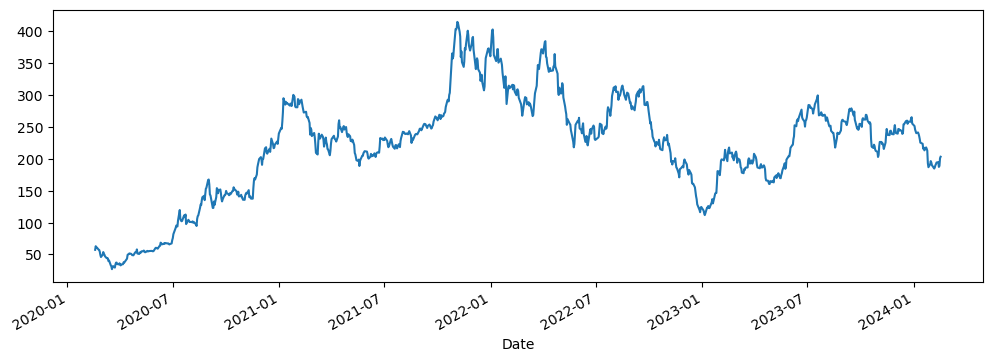

In [22]:
data['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

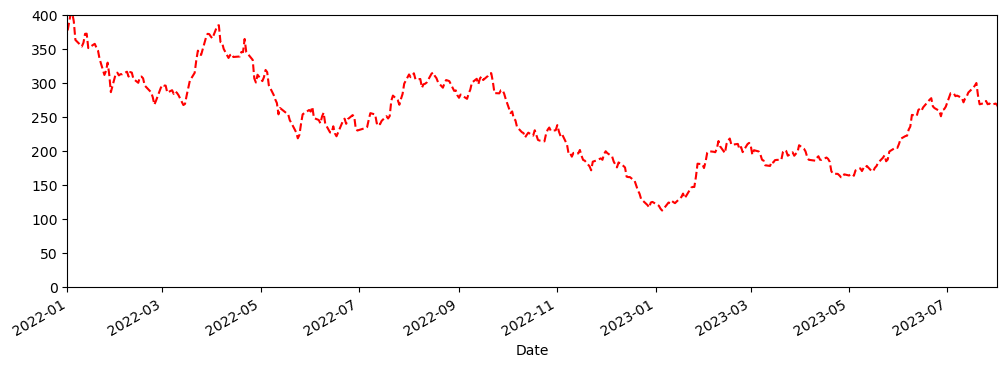

In [30]:
# giving x limit and y limit and coloring, ls = linestyling
data['High'].plot(xlim=['2022-01-01','2023-08-01'], ylim = [0,400], figsize=(12,4), c='red', ls='--')

In [39]:
data.loc['2022-01-01':'2023-08-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700
...,...,...,...,...,...,...
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000


In [41]:
index = data.loc['2022-01-01':'2023-08-01'].index
share_open = data.loc['2022-01-01':'2023-08-01']['Open']

In [42]:
share_open

Date
2022-01-03    382.583344
2022-01-04    396.516663
2022-01-05    382.216675
2022-01-06    359.000000
2022-01-07    360.123322
                 ...    
2023-07-26    263.250000
2023-07-27    268.309998
2023-07-28    259.859985
2023-07-31    267.480011
2023-08-01    266.260010
Name: Open, Length: 396, dtype: float64

In [43]:
index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-24',
               '2023-07-25', '2023-07-26', '2023-07-27', '2023-07-28',
               '2023-07-31', '2023-08-01'],
              dtype='datetime64[ns]', name='Date', length=396, freq=None)

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

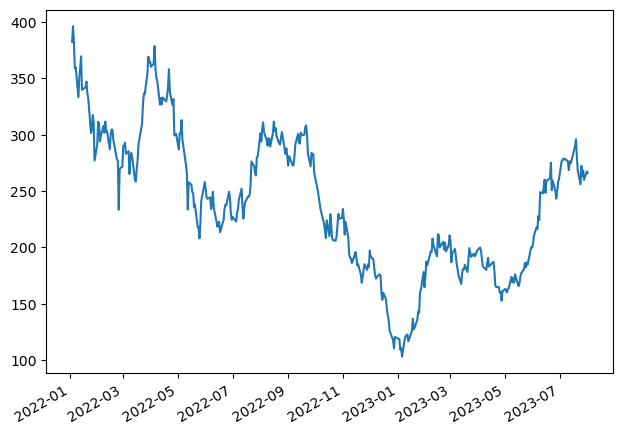

In [48]:
figure, axis = plt.subplots()
plt.tight_layout()
# to prevent overlapping
figure.autofmt_xdate()

axis.plot(index, share_open)

## Datetime Index

In [50]:
data = data.reset_index()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1008 non-null   datetime64[ns]
 1   Open       1008 non-null   float64       
 2   High       1008 non-null   float64       
 3   Low        1008 non-null   float64       
 4   Close      1008 non-null   float64       
 5   Adj Close  1008 non-null   float64       
 6   Volume     1008 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [53]:
pd.to_datetime(data['Date'])

0      2020-02-18
1      2020-02-19
2      2020-02-20
3      2020-02-21
4      2020-02-24
          ...    
1003   2024-02-12
1004   2024-02-13
1005   2024-02-14
1006   2024-02-15
1007   2024-02-16
Name: Date, Length: 1008, dtype: datetime64[ns]

In [55]:
data = data.set_index(['Date'],drop=True)

In [59]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-18,56.106667,57.333332,55.490665,57.226665,57.226665,245725500
2020-02-19,61.566666,62.985332,60.068001,61.161331,61.161331,381345000
2020-02-20,60.796665,60.799999,57.329334,59.960667,59.960667,264523500
2020-02-21,60.465332,60.870667,58.696667,60.066666,60.066666,214722000
2020-02-24,55.933334,57.566666,54.813332,55.585999,55.585999,227883000


In [60]:
from datetime import datetime

In [61]:
datetime(2022,11,20)

datetime.datetime(2022, 11, 20, 0, 0)

In [63]:
datetime.now()

datetime.datetime(2024, 2, 18, 16, 36, 1, 114111)

In [68]:
date = datetime(2024,2,18)

In [70]:
date.date()

datetime.date(2024, 2, 18)

In [71]:
date.day

18

In [73]:
date.weekday()

6

In [74]:
date.year

2024

In [75]:
date.month

2

## Time Resampling

- Rule 'A' : Year and Frequency
- Rule 'QS' : Quaterly

In [77]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-18,56.106667,57.333332,55.490665,57.226665,57.226665,245725500
2020-02-19,61.566666,62.985332,60.068001,61.161331,61.161331,381345000
2020-02-20,60.796665,60.799999,57.329334,59.960667,59.960667,264523500
2020-02-21,60.465332,60.870667,58.696667,60.066666,60.066666,214722000
2020-02-24,55.933334,57.566666,54.813332,55.585999,55.585999,227883000


In [78]:
# Minimum share price gone for that specific yer
data.resample(rule = 'A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,24.980000,26.990667,23.367332,24.081333,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,187.666672,29401800
2022-12-31,110.349998,116.269997,108.239998,109.099998,109.099998,41864700
2023-12-31,103.000000,111.750000,101.809998,108.099998,108.099998,65125200
2024-12-31,177.210007,184.679993,175.009995,181.059998,181.059998,81203000


In [79]:
# Maximum share price gone for that specific yer
data.resample(rule = 'A').max()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,666378600
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,221923300
2023-12-31,296.040009,299.290009,289.519989,293.339996,293.339996,306590600
2024-12-31,250.080002,251.250000,244.410004,248.419998,248.419998,198076800


<Axes: xlabel='Date'>

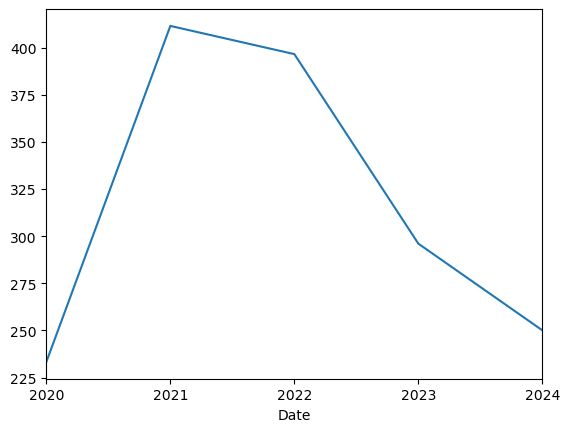

In [80]:
data.resample(rule = 'A').max()['Open'].plot()


<Axes: xlabel='Date'>

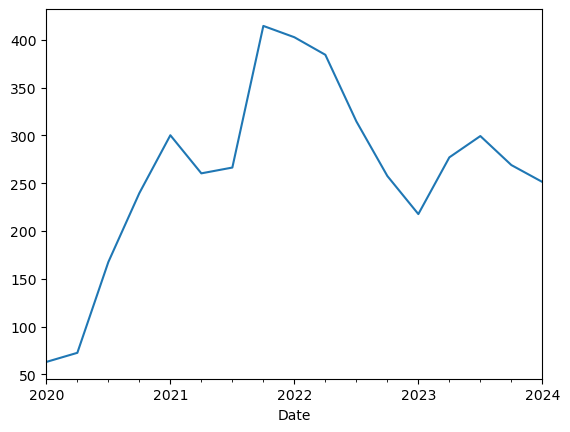

In [83]:
# Quartely Sampple
data.resample(rule = 'QS').max()['High'].plot()

In [85]:
## Business End Frequency
data.resample(rule = 'BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,666378600
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-30,396.516663,402.666656,378.679993,399.926666,399.926666,221923300
2023-12-29,296.040009,299.290009,289.519989,293.339996,293.339996,306590600
2024-12-31,250.080002,251.250000,244.410004,248.419998,248.419998,198076800


<Axes: xlabel='Date'>

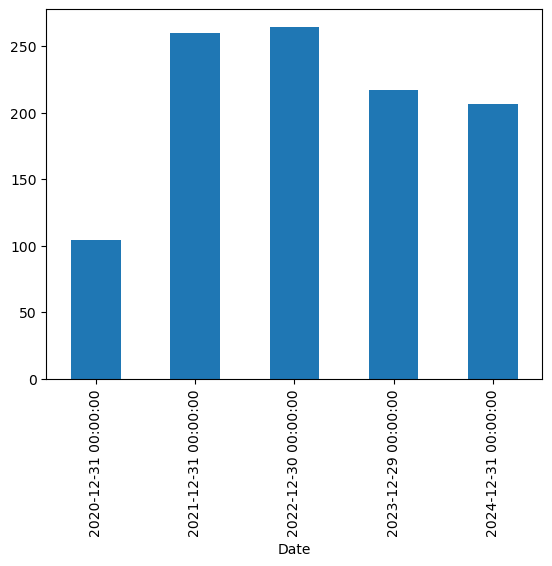

In [87]:
data['Open'].resample(rule = 'BA').mean().plot(kind = 'bar')

<Axes: xlabel='Date'>

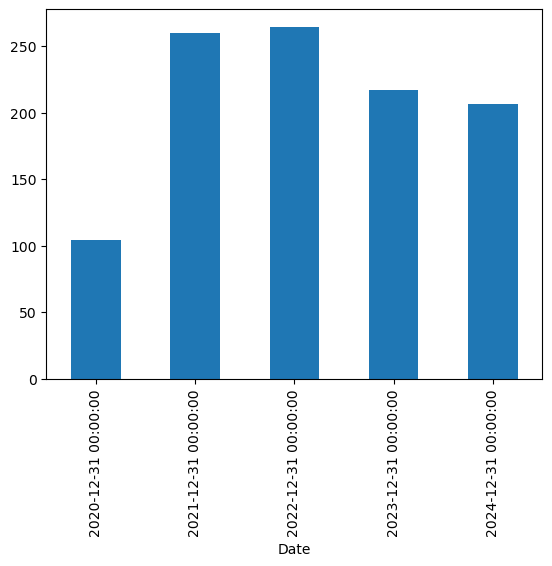

In [88]:
data['Open'].resample(rule = 'A').mean().plot(kind = 'bar')

<Axes: xlabel='Date'>

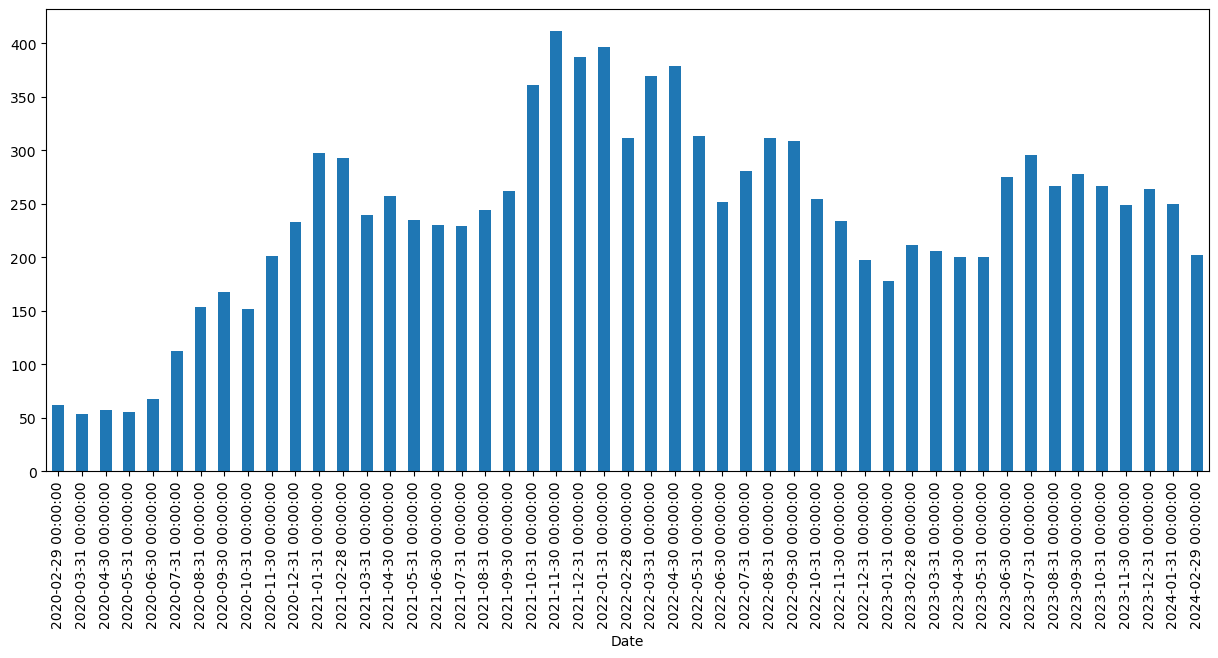

In [91]:
data['Open'].resample(rule = 'M').max().plot(kind= 'bar', figsize=(15,6))

In [86]:
## Business Quaters
data.resample(rule = 'BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,61.566666,62.985332,60.068001,61.161331,61.161331,452932500
2020-04-01,67.518669,72.512665,66.915337,71.987335,71.987335,487977000
2020-07-01,167.380005,167.496674,156.836670,166.106674,166.106674,584781000
2020-10-01,233.330002,239.573334,230.373337,235.223328,235.223328,666378600
2021-01-01,297.126678,300.133331,290.533325,294.363342,294.363342,268189500
2021-04-01,256.899994,260.263336,244.203339,254.106674,254.106674,147052200
2021-07-01,262.399994,266.333344,258.333344,263.786682,263.786682,100847400
2021-10-01,411.470001,414.496674,405.666656,409.970001,409.970001,188556300
2022-01-03,396.516663,402.666656,378.679993,399.926666,399.926666,151565700


## Rolling

In [96]:
data['High'].rolling(10).mean().head(20)

Date
2020-02-18          NaN
2020-02-19          NaN
2020-02-20          NaN
2020-02-21          NaN
2020-02-24          NaN
2020-02-25          NaN
2020-02-26          NaN
2020-02-27          NaN
2020-02-28          NaN
2020-03-02    55.581533
2020-03-03    55.228067
2020-03-04    54.039667
2020-03-05    52.931334
2020-03-06    51.557600
2020-03-09    50.220934
2020-03-10    48.963601
2020-03-11    47.898734
2020-03-12    46.930267
2020-03-13    46.377266
2020-03-16    44.718466
Name: High, dtype: float64

In [97]:
data['Open: 30 days rolling'] = data['Open'].rolling(30).mean()

In [99]:
data.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2020-02-18,56.106667,57.333332,55.490665,57.226665,57.226665,245725500,NaN
2020-02-19,61.566666,62.985332,60.068001,61.161331,61.161331,381345000,NaN
2020-02-20,60.796665,60.799999,57.329334,59.960667,59.960667,264523500,NaN
2020-02-21,60.465332,60.870667,58.696667,60.066666,60.066666,214722000,NaN
2020-02-24,55.933334,57.566666,54.813332,55.585999,55.585999,227883000,NaN
2020-02-25,56.599998,57.106667,52.466667,53.327332,53.327332,259357500,NaN
2020-02-26,52.166668,54.220669,51.740665,51.919998,51.919998,211282500,NaN
2020-02-27,48.666668,49.318001,44.599998,45.266666,45.266666,364158000,NaN
2020-02-28,41.980000,46.034668,40.768002,44.532665,44.532665,363343500,NaN


<Axes: xlabel='Date'>

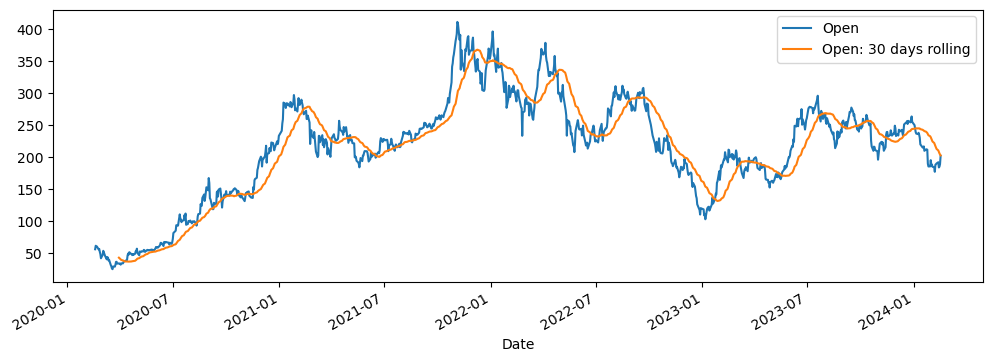

In [104]:
data[['Open','Open: 30 days rolling']].plot(figsize =(12,4))